In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from layers.QConv2D import QConv2D
from circuits.random import ry_random

import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [10]:
QUBITS      = 16
KERNEL_SIZE = 3
FILTERS     = 3
N_LAYERS    = 1
STRIDE      = 1
NUM_JOBS    = 10

In [11]:
circuit = ry_random(QUBITS, KERNEL_SIZE, FILTERS, N_LAYERS)

In [12]:
drawer = qml.draw(circuit)
params = np.zeros(QUBITS)
print(drawer(params))

 0: ──RY(0.00)─╭RandomLayers(M0)─┤  <Z>
 1: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 2: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 3: ──RY(0.00)─├RandomLayers(M0)─┤     
 4: ──RY(0.00)─├RandomLayers(M0)─┤     
 5: ──RY(0.00)─├RandomLayers(M0)─┤     
 6: ──RY(0.00)─├RandomLayers(M0)─┤     
 7: ──RY(0.00)─├RandomLayers(M0)─┤     
 8: ──RY(0.00)─├RandomLayers(M0)─┤     
 9: ───────────├RandomLayers(M0)─┤     
10: ───────────├RandomLayers(M0)─┤     
11: ───────────├RandomLayers(M0)─┤     
12: ───────────├RandomLayers(M0)─┤     
13: ───────────├RandomLayers(M0)─┤     
14: ───────────├RandomLayers(M0)─┤     
15: ───────────╰RandomLayers(M0)─┤     


In [13]:
conv1 = QConv2D(circuit, FILTERS, KERNEL_SIZE, STRIDE, NUM_JOBS)

In [14]:
img = np.random.rand(32,32,3)
out = conv1.apply(img, verbose = False)

Column:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

Row:   0%|          | 0/29 [00:00<?, ?it/s]

In [84]:
print(out.shape)

(29, 29, 3)


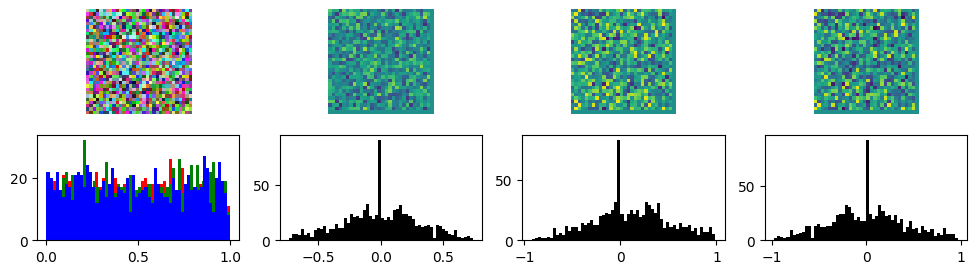

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

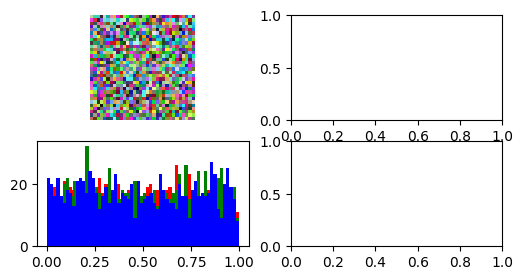

In [103]:
fig, axes = plt.subplots(nrows = 2, ncols = FILTERS+1, figsize = (3*(FILTERS+1),3))
axes[0,0].imshow(img, vmin = 0, vmax = 1)
axes[0,0].axis('off')
axes[1,0].hist(img[...,0].flatten(), 60, color='red')
axes[1,0].hist(img[...,1].flatten(), 60, color='green')
axes[1,0].hist(img[...,2].flatten(), 60, color='blue')

for i in range(FILTERS):
    axes[0,i+1].imshow(out[...,i], vmin = -1, vmax = 1)
    axes[0,i+1].axis('off')
    axes[1,i+1].hist(out[...,i].flatten(), 60, color='black')
    
plt.show()
plt.close()

fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (3*2,3))
axes[0,0].imshow(img, vmin = 0, vmax = 1)
axes[0,0].axis('off')
axes[1,0].hist(img[...,0].flatten(), 60, color='red')
axes[1,0].hist(img[...,1].flatten(), 60, color='green')
axes[1,0].hist(img[...,2].flatten(), 60, color='blue')

axes[0,1].imshow(out[...,:3], vmin = -1, vmax = 1)
axes[0,1].axis('off')
axes[1,1].hist(out[...,0].flatten(), 60, color='red')
axes[1,1].hist(out[...,1].flatten(), 60, color='green')
axes[1,1].hist(out[...,2].flatten(), 60, color='blue')
    
plt.show()
plt.close()